# 선형 연립 방정식

__'선형 방정식(Linear Equation)'__ 또는 일차 방정식은 최고차 항의 차수가 1을 넘지 않는 다항 방정식.
변수가 n개인 선형 방정식을 다음과 같이 나타낼 수 있다. (a1,,an,b는 상수)
  
a1x1 + a2x2 + ... + anxn = b  

선형 방정식을 다음과 같이 행렬로 바꾸어 표현 가능. 열벡터를 디폴트로 사용하기 때문에 벡터 a는 전치된 벡터로 나타낸다.  

둘 이상의 선형 방정식을 묶어서 __선형 연립 방정식__' 을 만든다.

### 선형 방정식의 개수가 미지수의 개수가 같은 경우 

선형 연립 방정식을 구성하는 선형방정식의 개수가 미주수의 개수가 같으면 행렬로 변환하면 정사각 행렬로 계수가 표현된다. 역행렬이 구해지면 역행렬을 사용하여 선형 연립 방정식을 풀 수 있으며 이때 하나의 해가 존재한다.

In [7]:
# 역행렬을 통해 선형방정식의 해를 구한다.

import numpy as np

A = np.array([[7,2],[-7,5]])
b = np.array([-5,12])

# Ax = B
# x = (A^-1)b
invA = np.linalg.inv(A)
x = np.dot(invA,b)
x

array([-1.,  1.])

In [8]:
# 넘파이에서 아규먼트로 입력되는 행렬 A는 정사각형 행렬이고, full-rank 라면 n x n 행렬인 경우엔 랭크가 n이어야 한다. 이때, solve함수를 사용하여 해를 구할 수 있다.
# inverse를 구할 필요도 없다.
import numpy as np

A = np.array([[7,2],[-7,5]])
b = np.array([-5,12])

print(np.linalg.matrix_rank(A))

x = np.linalg.solve(A,b)
print(x)

2
[-1.  1.]


-1.0 1.0
7 2 -5
-7 5 12


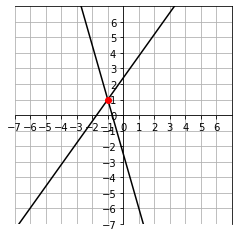

In [22]:
# 2개의 선형 방정식을 직선으로 그리면, 선형 방정식의 해는 두 직선의 교차점에 위치한다.
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[7,2],[-7,5]])
b = np.array([-5,12])

x = np.linalg.solve(A,b)

# 해벡터인 x를 그래프로 표현 x1,y1 표기
x1, y1 = x
print(x1, y1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 선형 방정식을 직선으로 그린다.
a1 = A[:, 0]
b1 = A[:, 1]
c1 = -b

for c1, c2, c3 in zip(A[:,0],A[:,1],b) :
    print(c1,c2,c3)
    x = np.linspace(-7,7,100)
    y = (c3-c1*x)/c2
    ax.plot(x,y,color="black")

    
# 연립 방정식의 해를 빨간점으로 표시
ax.plot(x1, y1, 'ro')

ax.axis([-7,7,-7,7])
ax.set_xticks(range(-7,7))
ax.set_yticks(range(-7,7))
ax.grid()
ax.set_axisbelow(True)
ax.set_aspect('equal', adjustable='box')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.show()

In [23]:
# 해가 없는 경우 : 5x + 5y = 10 , 5x + 5y = 20 와 같이 평행할때,
A = np.array([[5,5],[5,5]])
b = np.array([10,20])

x = np.linalg.solve(A,b)

LinAlgError: Singular matrix

In [24]:
# 해가 무수히 많은 경우 x + y = 10 , 2x + 2y = 20, 과 같이 한직선에 일치하는경우
A = np.array([[1,1],[2,2]])
b = np.array([10,20])

x = np.linalg.solve(A,b)

LinAlgError: Singular matrix

### 선형방정식의 개수와 미지수의 개수가 다른경우 

선형 연립 방정식을 구성하는 선형 방정식의 개수와 미지수의 개수가 같지 않은 경우 행렬로 변환하면 __직사각형 행렬(retangular mamtrix)__ 로 계수가 표현된다. 선형 방정식의 개수가 더 많은 경우에는 무한해가 되며 , 미지수의 개수가 더 많은 경우에는 해가 존재 하지 않는다. 이 경우 __최소제곱법 (least squares)__ 으로 해를 구할 수 있다. 

In [35]:
# 선형 방정식의 개수가 미지수의 개수보다 적은 경우,
# 일반적으로 무한 개의 해를 가진다.
# 행렬이 정사각형이 아니므로 numpy의 solve 함수는 사용이 불가능 하다, 이때는 lstsq 함수를 사용할 수 있다.

import numpy as np

# 행렬 A의 크기는 2x3 
A = np.array([[1,2,3],[1,5,1]])
# 행렬 b의 크기는 2x1
b = np.array([2,1])

# 행렬 x의 크기는 3x1 이 된다.
x = np.linalg.lstsq(A,b, rcond= -1)[0]

In [36]:
x

array([0.14285714, 0.05494505, 0.58241758])

아까 설명에서는 무수히 많은 해가 나온다고 했는데 위의경우 하나의 해가 나왔다. 위의 해는 어떤 해일까?
기하학적으로 알아보자

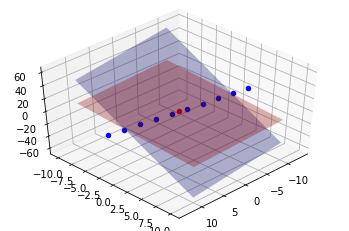

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 행렬 A의 크기는 2x3
A = np.array([[1,2,3],[1,5,1]])
b_ = np.array([2,1])

x = np.linalg.lstsq(A,b_, rcond=-1)[0]

fig = plt.figure()
#ax = fig.add_subplot(1,1,1, projection='3d')
ax = fig.gca(projection='3d')

dim = 10

a1 = A[0]
a2 = A[1]

a = a1[0]
b = a1[1]
c = a1[2]
d = -b_[0]

X1,Y1 = np.meshgrid([-dim,dim],[-dim,dim])
Z1 = (d-a*X1-b*Y1)/c

a = a2[0]
b = a2[1]
c = a2[2]
d = -b_[1]
X2,Y2 = np.meshgrid([-dim,dim],[-dim,dim])
Z2 = (d-a*X2-b*Y2)/c

v = np.cross(a1,a2)

for t in np.linspace(-1,1,10) :
    x1 = x[0] +v[0] * t
    y1 = x[1] +v[1] * t
    z1 = x[2] +v[2] * t
    ax.scatter(x1,y1,z1, color='blue', zorder=4)
    
    
ax.plot_surface(X1,Y1,Z1, color='red', alpha=.3, linewidth=0, zorder=1)
ax.plot_surface(X2,Y2,Z2, color='blue', alpha=.3, linewidth=0, zorder=3)


ax.scatter(x[0],x[1],x[2],color='red',zorder=5)

ax.view_init(45,45)

matplotlib를 사용ㅎ여 그래프로 그려보면 lstsq 함수는 2개의 평면이 만나는 교선의한 점을 리턴 하는것을 알 수 있다. 두 평면의 해는 하나의 직선인데  lstsq 함수는 그중 한 점을 리턴하는 것이다.